In [14]:
from ipywidgets import interact
from discopy import *

_print = lambda circuit: print(str(circuit).replace('>>', '\n>>'))

In [2]:
def inormalize(diagram):
    steps = [diagram] + list(diagram.normalize())
    @interact
    def widget(step=(0, len(steps) - 1, 1)):
        steps[step].draw()

In [3]:
x, y = Ty('x'), Ty('y')
d = Box('f', x, x @ y) @ Id(x) >> Id(x) @ Box('g', y @ x, x)
diagram = (d @ d.dagger() >> d.dagger() @ d)
inormalize(diagram)

interactive(children=(IntSlider(value=2, description='step', max=4), Output()), _dom_classes=('widget-interact…

In [4]:
inormalize(moncat.build_spiral(3))

interactive(children=(IntSlider(value=28, description='step', max=56), Output()), _dom_classes=('widget-intera…

In [5]:
a, b, c, d = Ty('a'), Ty('b'), Ty('c'), Ty('d')
snake = Box('f', a @ b, c @ d)\
    .transpose_l().transpose_l()\
    .transpose_r().transpose_r()\
    .transpose_l().transpose_r()
inormalize(snake)

interactive(children=(IntSlider(value=50, description='step', max=101), Output()), _dom_classes=('widget-inter…

In [6]:
s, n = Ty('s'), Ty('n')
Alice, Bob = Word('Alice', n), Word('Bob', n)
loves_box = Box('loves', n @ n, s)
loves = Cap(n.r, n) @ Cap(n, n.l)\
    >> Id(n.r) @ loves_box @ Id(n.l)
grammar = Cup(n, n.r) @ Id(s) @ Cup(n.l, n)
sentence = Alice @ loves @ Bob >> grammar
inormalize(sentence)

interactive(children=(IntSlider(value=3, description='step', max=7), Output()), _dom_classes=('widget-interact…

In [19]:
loves_ansatz = circuit.CX\
    >> circuit.sqrt(2) @ circuit.H @ circuit.X\
    >> Bra(0, 0)
ob = {s: 0, n: 1}
ar = {Alice: Ket(0), loves_box: loves_ansatz, Bob: Ket(1)}
F = CircuitFunctor(ob, ar)
print("Trying to apply a circuit functor on a snake:")
try:
    F(sentence).normal_form()
except NotImplementedError as err:
    _print("NotImplementedError(\"{}\")".format(err))

Trying to apply a circuit functor on a snake:
NotImplementedError("Ket(0) 
>> Id(1) @ Ket(0, 0) 
>> Id(1) @ H @ sqrt(2).dagger() @ Id(1) 
>> Id(1) @ CX.dagger() 
>> Id(3) @ Ket(0, 0) 
>> Id(3) @ H @ sqrt(2).dagger() @ Id(1) 
>> Id(3) @ CX.dagger() 
>> Id(2) @ CX @ Id(1) 
>> Id(2) @ sqrt(2) @ Id(3) 
>> Id(2) @ H @ Id(2) 
>> Id(3) @ X @ Id(1) 
>> Id(2) @ Bra(0, 0) @ Id(1) 
>> Id(3) @ Ket(1) 
>> CX @ Id(2) 
>> H @ sqrt(2) @ Id(3) 
>> Bra(0, 0) @ Id(2) 
>> CX 
>> H @ sqrt(2) @ Id(1) 
>> Bra(0, 0) is not connected.")


In [16]:
print("Autonomising before applying the functor:")
_print(F(sentence.normal_form()))

Autonomising before applying the functor:
Ket(0) 
>> Id(1) @ Ket(1) 
>> CX 
>> sqrt(2) @ Id(2) 
>> H @ Id(1) 
>> Id(1) @ X 
>> Bra(0, 0)


In [17]:
assert F(sentence).eval() == F(sentence.normal_form()).eval()

In [18]:
Eckmann_Hilton = Box('s0', Ty(), Ty()) @ Box('s1', Ty(), Ty())
try:
    Eckmann_Hilton.normal_form()
except NotImplementedError as err:
    print("NotImplementedError(\"{}\")".format(err))

NotImplementedError("s0 >> s1 is not connected.")


In [20]:
gen = Eckmann_Hilton.normalize()
for _ in range(5):
    print(next(gen))
print('...')

s1 >> s0
s0 >> s1
s1 >> s0
s0 >> s1
s1 >> s0
...


In [21]:
twist = Id(x) @ Cap(x.r, x.r.r) >> Cup(x, x.r) @ Id(x.r.r)
inormalize(twist >> twist.dagger())

interactive(children=(IntSlider(value=2, description='step', max=5), Output()), _dom_classes=('widget-interact…

In [22]:
assert (twist >> twist.dagger()).normal_form() == Id(x)

In [24]:
print(twist >> twist.dagger())
gen = (twist >> twist.dagger()).normalize()
for _ in range(5):
    print(next(gen))

Id(x) @ Cap(x.r, x.r.r) >> Cup(x, x.r) @ Id(x.r.r) >> Cap(x, x.r) @ Id(x.r.r) >> Id(x) @ Cup(x.r, x.r.r)
Cap(x.r.r, x.r) @ Id(x) >> Id(x.r.r) @ Cup(x.r, x) >> Cap(x, x.r) @ Id(x.r.r) >> Id(x) @ Cup(x.r, x.r.r)
Cap(x, x.r) @ Id(x) >> Id(x @ x.r) @ Cap(x.r.r, x.r) @ Id(x) >> Id(x @ x.r @ x.r.r) @ Cup(x.r, x) >> Id(x) @ Cup(x.r, x.r.r)
Cap(x, x.r) @ Id(x) >> Id(x @ x.r) @ Cap(x.r.r, x.r) @ Id(x) >> Id(x) @ Cup(x.r, x.r.r) @ Id(x.r @ x) >> Id(x) @ Cup(x.r, x)
Cap(x, x.r) @ Id(x) >> Id(x) @ Cup(x.r, x)
Id(x)


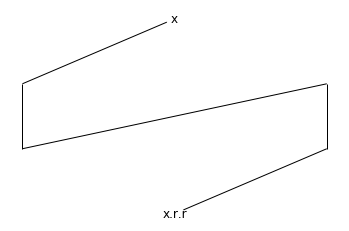

(<networkx.classes.graph.Graph at 0x1223f5fd0>,
 {'input_0': (-0.5, 3),
  'wire_0_0': (-1.0, 2),
  'wire_1_1': (0.0, 1),
  'output_0': (-0.5, 0),
  'wire_0_1': (0.0, 2),
  'wire_1_0': (-1.0, 1)},
 {'input_0': 'x', 'output_0': 'x.r.r'})

In [32]:
twist.draw()